# The complete analysis of IMDb movie genres
The original dataset was downloaded from the IMDb website and contained millions of data. The dataset was modified and fileterd and now it only contains about 280000 rows of data. Such modification is definitely expected to take some time so parts 1 and 2 are commented to only give an idea how the mentioned was done.  
The main focus of this project is to compare and understand the trends of the entertainment industry from the beginning of the 21st century up until today.

## 1.Data type conversion
The code below demonstrates how I converted the tsv file downloaded from the IMDb to a csv file using Pandas. TSV is short for "Tab Seperated Values" so i used sep="\t" (which is the seperator) to tell Pandas that the file is tab seperated. In the second line , I saved the dataframe as a csv file called title_basics. The original dataset was 800 MB and it took some time for the conversion to complete. I still wanted to fully show all the procedures that were done in this project so I decided to put some parts of the code as comments so that they are not executable but everyone could get an idea of how everything was implemented.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv("title.basics.tsv" , sep="\t")
#df.to_csv("title_basics.csv" , index=False)

## 2.Data cleaning
This dataset needed some serious cleanup since it contained many NaN fields. Also there were some columns that weren't needed in this project so those were deleted as well. As explained before, I tried to convert this dataset to a much smaller one so I decided to only keep some of the most known genres and productions with more than one genre were dropped. Last thing to mention is that this project only focuses on movies and shows that were created in the 21st century so anything before the year 2000 was eliminated.
Just like the previous code block, all the lines of code are commented just to give an idea of how I did data cleaning(the acutual process took about 21 seconds).
- df = pd.read_csv("title_basics.csv", na_values="\\N")  
Reading the dataset using Pandas. The Na/n values in this dataset were shown using \N so 
- df.drop(columns=["isAdult", "endYear", "tconst", "primaryTitle"], inplace=True)  
Dropping unwanted columns and making sure the changes are permanent using "inplace=True"
- df.dropna(inplace=True)  
Dropping all the NaN values and making sure the changes are permanent using "inplace=True"
- all_genres = ["comedy", "thriller", "romance", "drama", "action", "history", "adventure" , "crime"]  
The focused genres
- df = df[df['genres'].apply(lambda x: len(x.split(",")) == 1 and x.split(",")[0].strip().lower() in all_genres)]  
Making sure only single genre movies are staying in the dataset using split() function and then checking whether the genre is in our desired list
- df["startYear"] = pd.to_numeric(df["startYear"], errors="coerce")  
converting the production years to numeric values and setting NaN to the invalid ones
- df = df[(df["startYear"] >= 2000) & (df["startYear"] <= 2024)]  
only keeping movies that were produced between 2000 and 2024
- df.to_csv("imdb_final_dataset.csv", index=False)  
generating the final csv file needed for this project




In [2]:
# df = pd.read_csv("title_basics.csv", na_values="\\N")
# df.drop(columns=["isAdult", "endYear", "tconst", "primaryTitle"], inplace=True)
# df.dropna(inplace=True)
# all_genres = ["comedy", "thriller", "romance", "drama", "action", "history", "adventure" , "crime"]
# df = df[df['genres'].apply(lambda x: len(x.split(",")) == 1 and x.split(",")[0].strip().lower() in all_genres)]
# df["startYear"] = pd.to_numeric(df["startYear"], errors="coerce")
# df = df[(df["startYear"] >= 2000) & (df["startYear"] <= 2024)]
# df.to_csv("imdb_final_dataset.csv", index=False)


## 3.Reading the dataset
The dataset contains the following columns:
- titleType: The type of production eg. movie or episode
- originalTitle: The title of the production
- startYear: Shows the year in which the production was released in
- runtimeMinutes: The length of the production in minutes
- genres: The genres of the production


In [3]:
df = pd.read_csv("imdb_final_dataset.csv")
#showing the first few rows
df.head()

,titleType,originalTitle,startYear,runtimeMinutes,genres
0,movie,El tango del viudo y su espejo deformante,2020.0,70.0,Drama
1,movie,The Other Side of the Wind,2018.0,122.0,Drama
2,movie,El realismo socialista,2023.0,78.0,Drama
3,movie,Crime and Punishment,2002.0,126.0,Drama
4,movie,Shepherd on the Rock,2014.0,90.0,Drama


In [4]:
#showing the filtered dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281325 entries, 0 to 281324
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   titleType       281325 non-null  object 
 1   originalTitle   281325 non-null  object 
 2   startYear       281325 non-null  float64
 3   runtimeMinutes  281325 non-null  float64
 4   genres          281325 non-null  object 
dtypes: float64(2), object(3)
memory usage: 10.7+ MB


In [5]:
#showing the number of rows in the dataset using shape() function
print("Number of rows: " , df.shape[0])
#showing the number of columns in the dataset using shape() function
print("Number of columns: " , df.shape[1])

Number of rows:  281325
Number of columns:  5


## 4.Plots

### 1.Number of production by genre
This plot illustrates the amount of production per genre in the 21st century. It's visible that "drama" was the most popular between directors and "historical" movies had the least attention in the pasr 24 years.


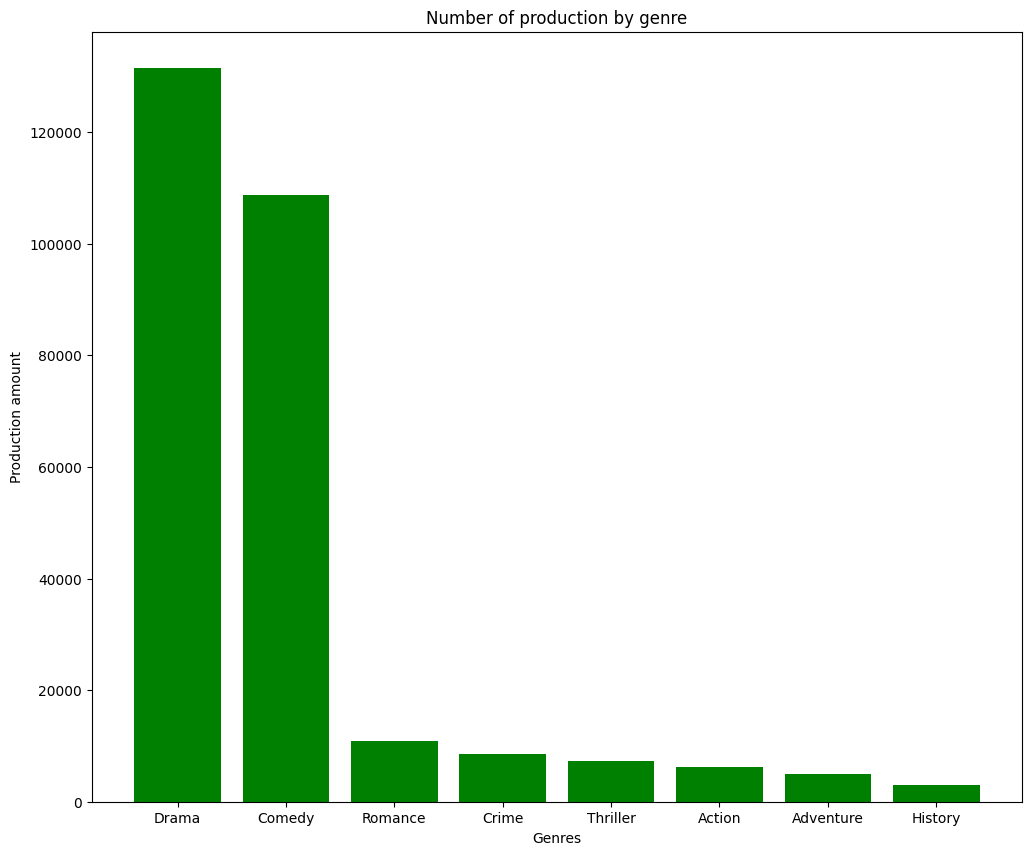

In [6]:
plt.figure(figsize=(12, 10))
plt.title("Number of production by genre")
#counting the numbers of genres in the dataset using value_counts()
genre_numbers = df["genres"].str.strip().value_counts()
#demonstrating the result on a bar chart
plt.bar(genre_numbers.index, genre_numbers.values ,color="green")
plt.ylabel("Production amount")
plt.xlabel("Genres")
plt.show()

### 2.Number of production types
This bar chart shows the most and least production types in the past 25 years. Tv episodes were on the top at almost 175000 and video games were at the bottom.

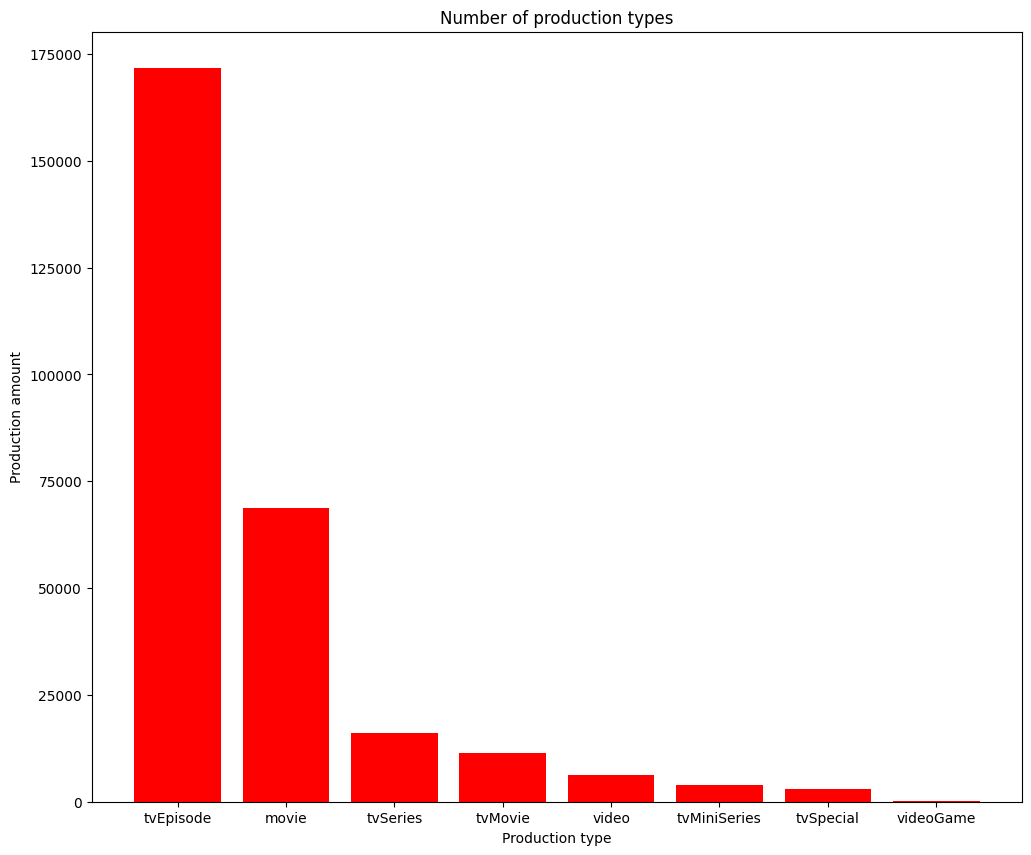

In [7]:
plt.figure(figsize=(12, 10))
plt.title("Number of production types")
#counting the types of production
production_type = df["titleType"].str.strip().value_counts()
#x-axis will show the production type and y-axis will show the numbers
plt.bar(production_type.index, production_type.values , color="red")
plt.xlabel("Production type")
plt.ylabel("Production amount")
plt.show()

### 3.Number of total production by year
This chart shows the total number of production per year. 2017 was the best year for the entertainment industry. In the past decade, 2023 experienced the lowest number of production.

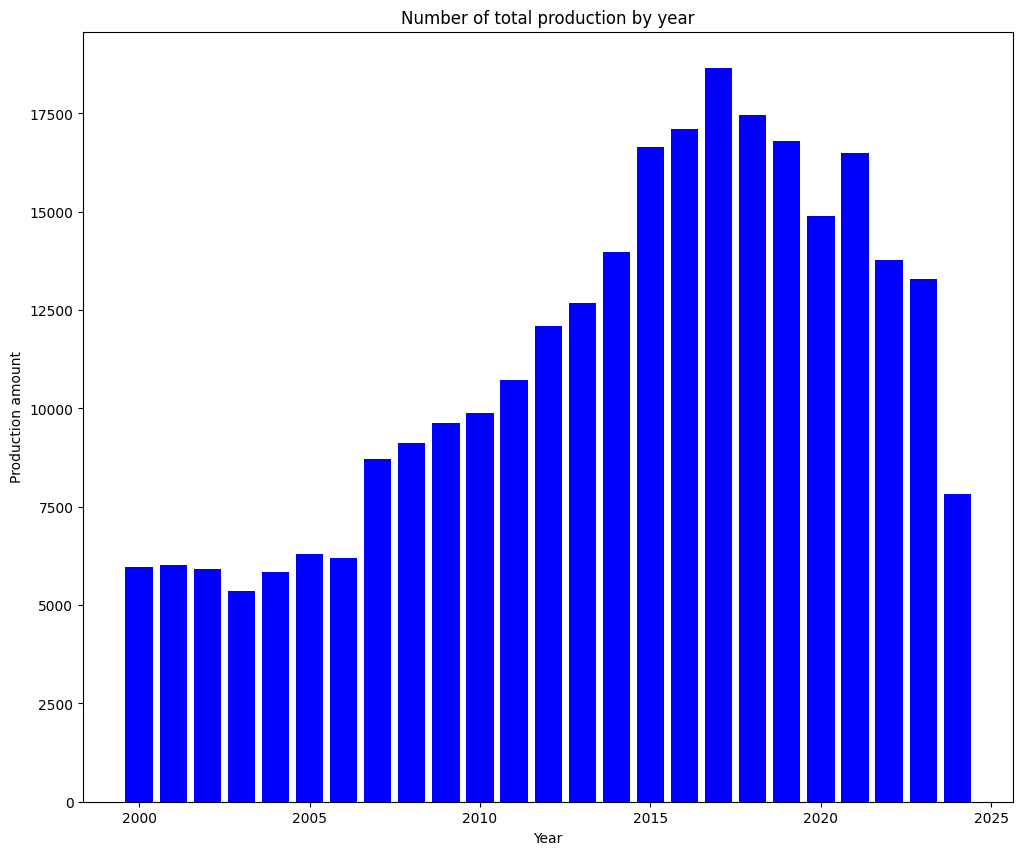

In [8]:
plt.figure(figsize=(12, 10))
plt.title("Number of total production by year")
#counting the production for each year
years = df["startYear"].value_counts()
#demonstrating the result on a bar chart
plt.bar(years.index, years.values , color="blue")
plt.xlabel("Year")
plt.ylabel("Production amount")
plt.show()


### 4.Production count of each genre by year
This bar chart shows the most popular genre over the past 25 years. "Drama" and "Comedy" had the most popularity and were at 1st or 2nd place depending on the year. "History" has been the least popular until now.

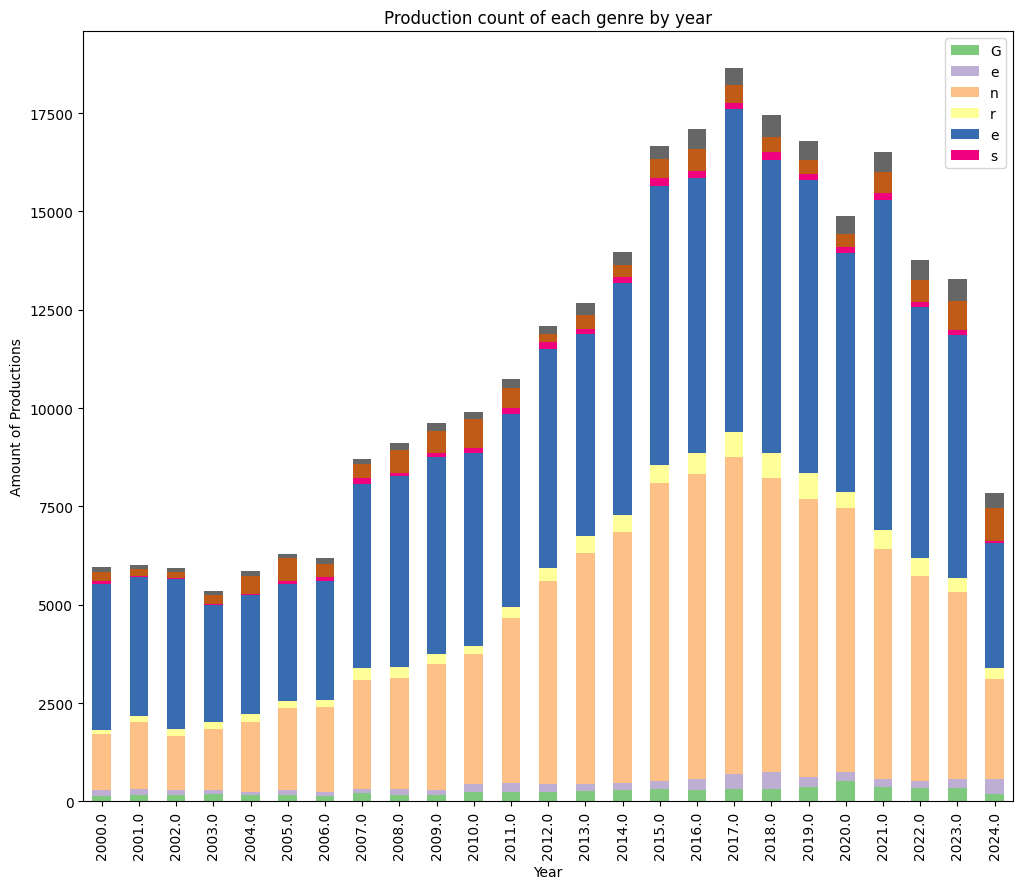

In [9]:

# Grouping by startYear and genres columns, combinating and counting them with size(). then reshaping with unstack()
production_count = df.groupby(["startYear", "genres"]).size().unstack()
# Demonstrating the result using a stacked bar chart with a colormap
production_count.plot.bar(stacked=True, figsize=(12, 10) ,colormap="Accent")
plt.title("Production count of each genre by year")
plt.xlabel('Year')
plt.ylabel("Amount of Productions")
plt.legend("Genres")
plt.show()


### 5.Average runtime by genre
This bar chart shows which genres have the lengthiest productions. "Action" and "Thriller" had the average of 80 minutes for their runtime and "comedy" productions are the shortest. 

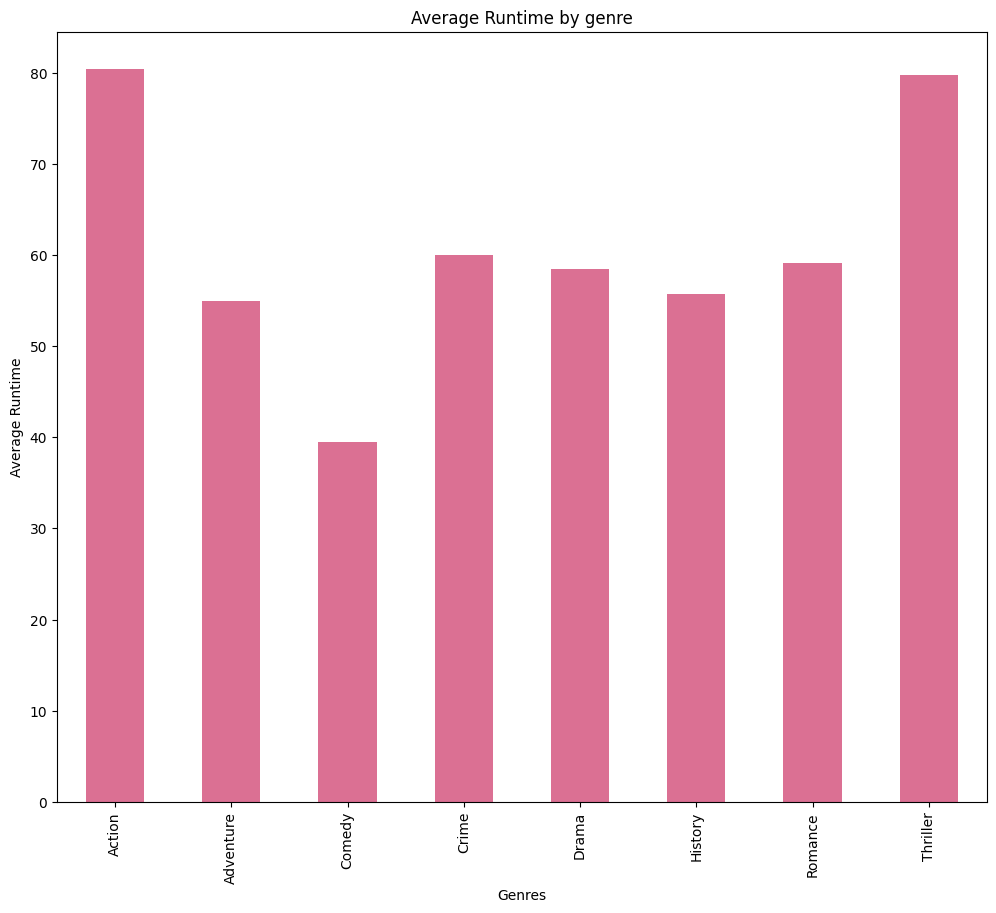

In [10]:
df = pd.read_csv("imdb_final_dataset.csv")
average_runtime = df.groupby("genres")["runtimeMinutes"].apply(np.mean)
#demonstarting the results
plt.figure(figsize=(12, 10))
average_runtime.plot(kind="bar", color="palevioletred")
plt.title("Average Runtime by genre")
plt.xlabel("Genres")
plt.ylabel("Average Runtime")
plt.show()

### 6.Average production runtime over the years
The chafrt below shows the changes in the lengths of entertainment industry productions over the years. They fluctuated a lot but overall they were longer in the 2000s , shorter in the 2010s and they've started making relatively longer projects again in the 2020s.

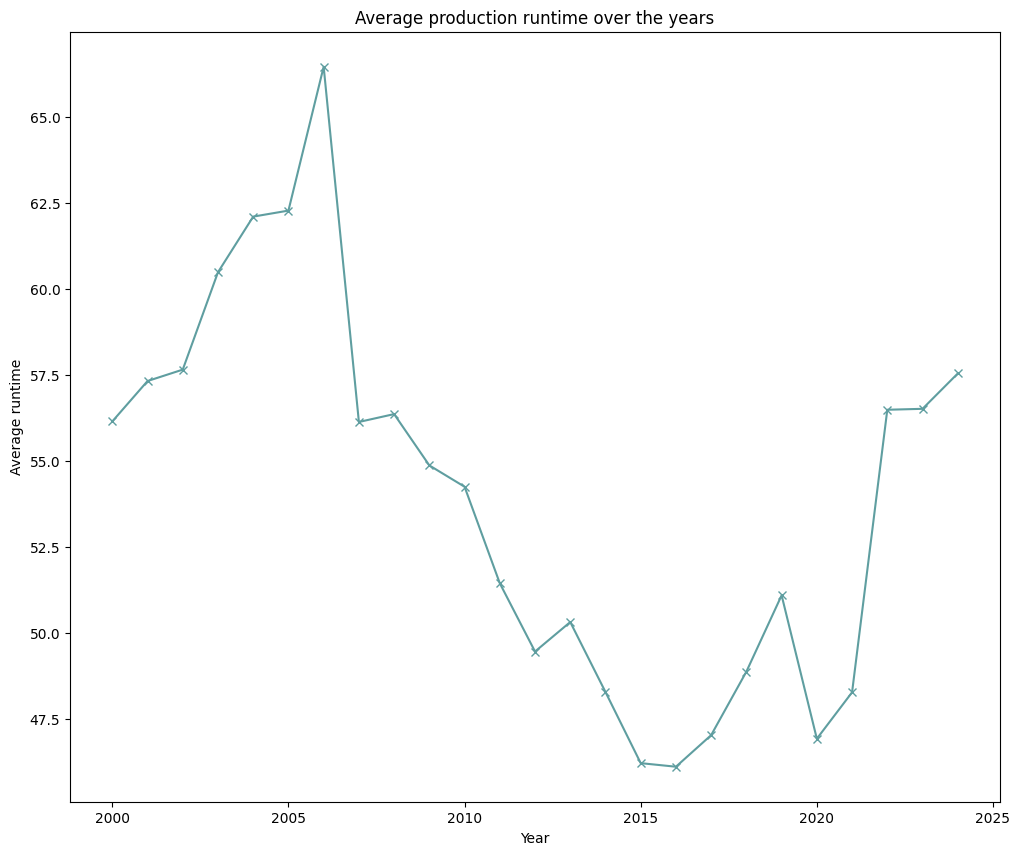

In [11]:
df = pd.read_csv("imdb_final_dataset.csv")
yearly_trends = df.groupby("startYear")["runtimeMinutes"].apply(np.mean)
plt.figure(figsize=(12, 10))
plt.title("Average production runtime over the years")
yearly_trends.plot(marker="x" , color="cadetblue")
plt.xlabel("Year")
plt.ylabel("Average runtime")
plt.show()

### 7.Distribution of production number by runtime
This histogram shows distributions. Most projects are under an hour long the minority exceed 3 hours.

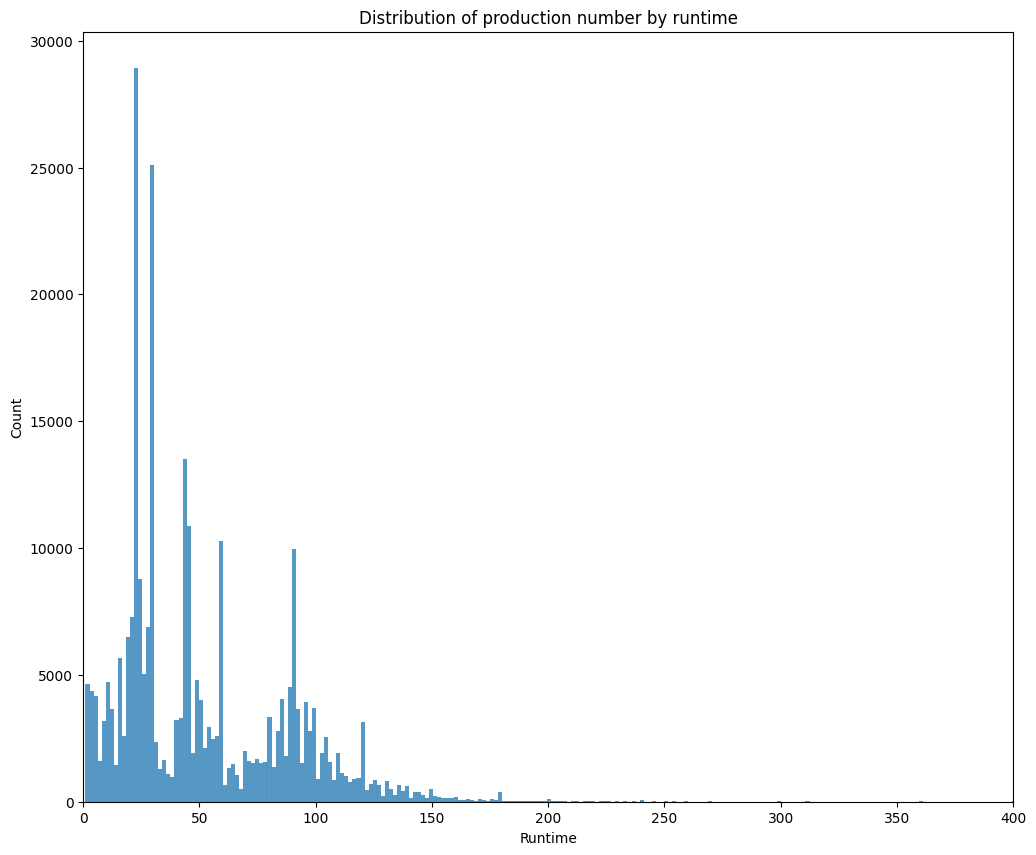

In [12]:
plt.figure(figsize=(12,10))
#drawing a histogram using seaborn library
sns.histplot(df["runtimeMinutes"])
plt.title("Distribution of production number by runtime")
plt.xlabel("Runtime")
plt.ylabel("Count")
#setting limits of the x-axis
plt.xlim(0,400)
plt.show()

### 8.Average runtime by genre over years
The plot below illustrates how average runtime by gwnre has varied over the years. The "Adventure" genre had the most fluctuation over and nowadays these types projects are way shorter than they used to be.

<Figure size 1200x1000 with 0 Axes>

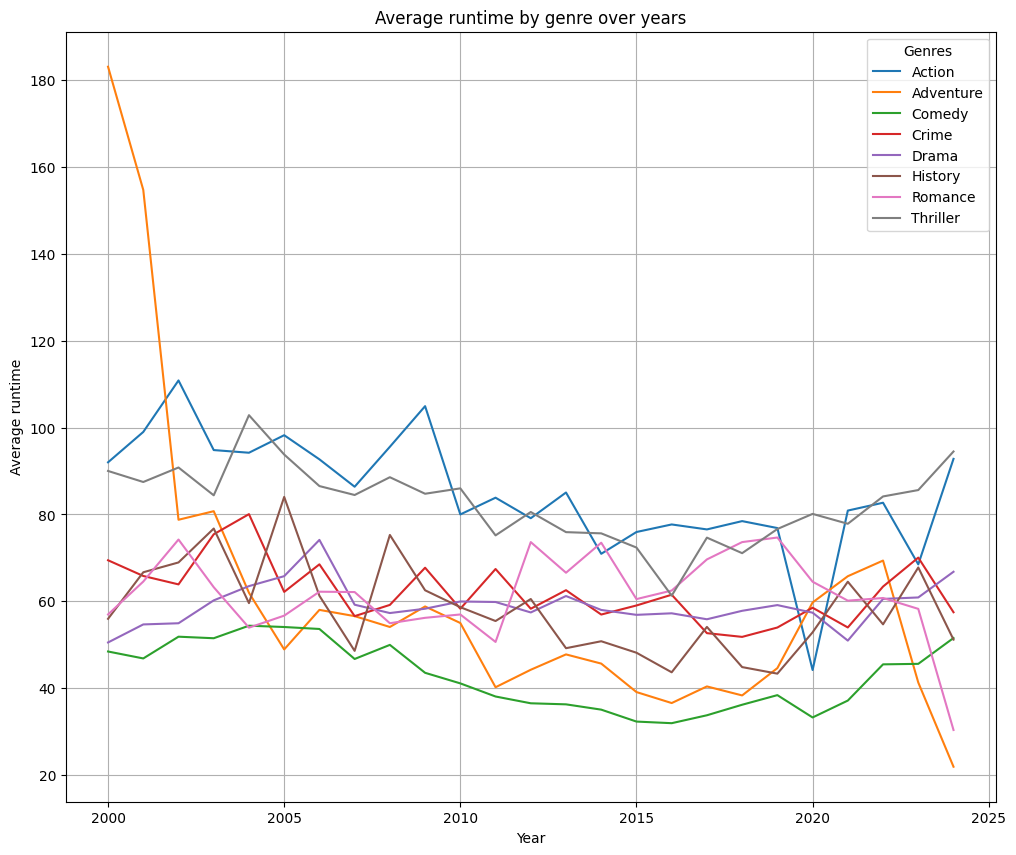

In [13]:
plt.figure(figsize=(12, 10))
#grouping by genre and startYear and combinating them, then calcluating the average runtime and reshaping with unstack()
year_rt_genre = df.groupby(["startYear", "genres"])["runtimeMinutes"].apply(np.mean).unstack()
year_rt_genre.plot(figsize=(12, 10))
plt.title("Average runtime by genre over years")
plt.xlabel("Year")
plt.ylabel("Average runtime")
plt.legend(title="Genres")
plt.grid()
plt.show()


### 9.Correlation heatmaps
The heatmap below shows that there really wasn't a relationship between runtime and the year projects were made in as the number is -0.048 and is close to 0.

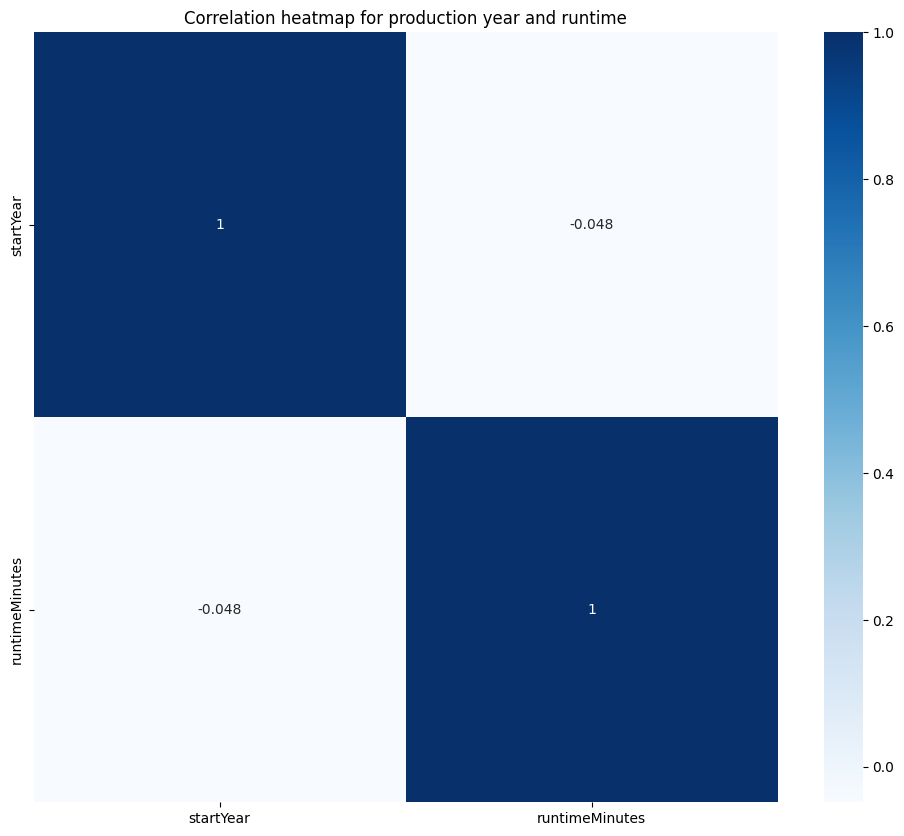

In [14]:

show_corr = df[['startYear', 'runtimeMinutes']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(show_corr, annot=True, cmap='Blues')
plt.title('Correlation heatmap for production year and runtime')
plt.show()


## 5.Conclusion
What we understand from this project is that the trends haven't really changed over the past few years. Genres like "Comedy" and "Drama" have had the first 2 spots in the past decades and "History" was the least popular.  
There were more single episodes made for Tv compared to movies and series, and lastly I understood that a project's production year doesn't really have anything to do with it's length.